# Order Note Analysis - Scrub

Goal:  convert order note text into traing and testing text source

In [1]:
#%pylab inline
%matplotlib inline
%config InlineBackend.figure_format='retina' 

import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import os, sys
import warnings

warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('whitegrid') 
# sns.set_style('darkgrid') 
# plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

## SQL Source

In [56]:
from decouple import config
config.search_path = '/home/jovyan/work'

In [57]:
engine = create_engine(config('DATABASE_DEV_URL'))

In [58]:
sql = '''

    select top 10 * from Integration.F5503_canned_message_file_parameters_Staging

'''


In [59]:
pf = pd.read_sql_query(sql, engine);

In [60]:
pf.dtypes

Q3KCOO_order_number_document_company     object
Q3DCTO_order_type                        object
Q3DOCO_salesorder_number                float64
Q3LNID_line_number                      float64
Q3$APC_application_code                  object
Q3$PMQ_program_parameter                 object
Q3LNGP_language                          object
Q3INMG_print_message                     object
Q3$SNB_sequence_number                  float64
QCTRDJ_order_date                        object
id                                        int64
chksum                                   object
dtype: object

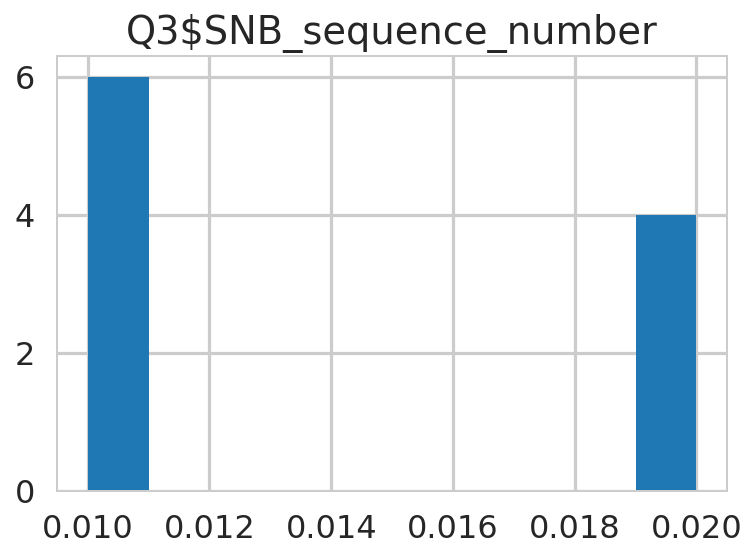

In [61]:
pf.hist('Q3$SNB_sequence_number');

In [62]:
pf.to_pickle('../data/note')

## Pickle Source

In [19]:
pf2 = pd.read_pickle('../data/note')

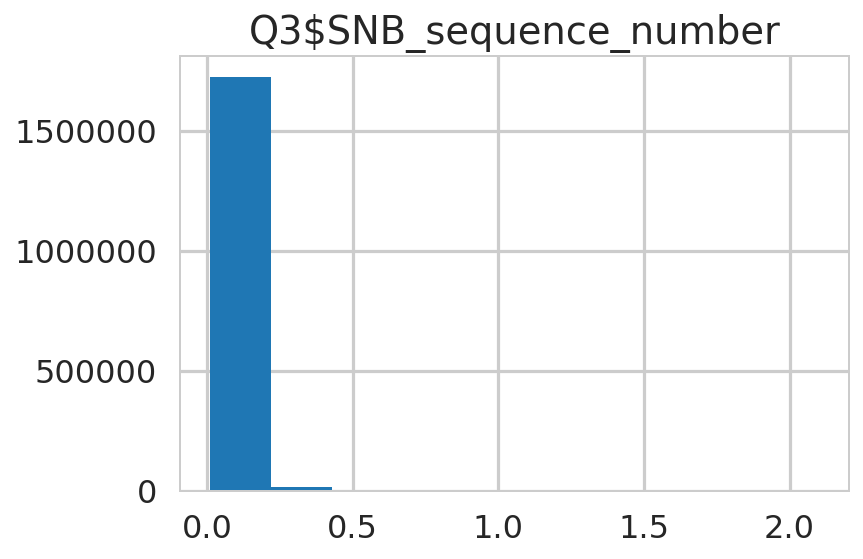

In [20]:
pf2.hist('Q3$SNB_sequence_number');

In [21]:
df = pf2

## cleanup

In [22]:
print(df.dtypes)
df.head()

Q3KCOO_order_number_document_company     object
Q3DCTO_order_type                        object
Q3DOCO_salesorder_number                float64
Q3LNID_line_number                      float64
Q3$APC_application_code                  object
Q3$PMQ_program_parameter                 object
Q3LNGP_language                          object
Q3INMG_print_message                     object
Q3$SNB_sequence_number                  float64
QCTRDJ_order_date                        object
id                                        int64
chksum                                   object
dtype: object


,Q3KCOO_order_number_document_company,Q3DCTO_order_type,Q3DOCO_salesorder_number,Q3LNID_line_number,Q3$APC_application_code,Q3$PMQ_program_parameter,Q3LNGP_language,Q3INMG_print_message,Q3$SNB_sequence_number,QCTRDJ_order_date,id,chksum
0,02000,SZ,11088929.0,999.999,,&11088929 ...,,SPLITINV,0.01,2018-02-14,1172799,b'\xdd\xd91`\x93\xaa\x1e\xa18\x8e\xde\xe0\x03\...
1,02000,SZ,11088930.0,-999.999,,&Customer PO--- A0000223674 ...,,9999,0.01,2018-02-14,1172800,"b'\\,\xfa\x86\x8b\xfa%\xc0\xc6\xb2p\xc2\xfa\x9..."
2,02000,SZ,11088930.0,-999.999,,&****Prices verified in coupa*** ...,,9999,0.02,2018-02-14,1172801,b'\xa1\xd3\xf3\xd0\x08cV\x98u\xa3\xca-\xdf\xb2...
3,02000,SZ,11088931.0,-999.999,,&Customer PO--- A0000223666 ...,,9999,0.01,2018-02-14,1172802,"b'\xa5\x01\xe9\x7f*\xc3mf=]W""\x95-\xaf\xc7\x83..."
4,02000,SZ,11088931.0,-999.999,,&***Prices verified in Coupa*** ...,,9999,0.02,2018-02-14,1172803,b'#9C\x89m?\xa4\xd8\xff\xc72\\\x15\xf38P\xfb\x...


In [23]:
list(df.columns)

['Q3KCOO_order_number_document_company',
 'Q3DCTO_order_type',
 'Q3DOCO_salesorder_number',
 'Q3LNID_line_number',
 'Q3$APC_application_code',
 'Q3$PMQ_program_parameter',
 'Q3LNGP_language',
 'Q3INMG_print_message',
 'Q3$SNB_sequence_number',
 'QCTRDJ_order_date',
 'id',
 'chksum']

In [24]:
df.drop(df.columns[[0,3,4,6,7,8]],axis=1, inplace=True)

In [33]:
df.head()

,order_type,salesorder_number,note,order_date,id,chksum
0,b'SZ',11088929.0,11088929 ...,2018-02-14,1172799,b'\xdd\xd91`\x93\xaa\x1e\xa18\x8e\xde\xe0\x03\...
1,b'SZ',11088930.0,Customer PO--- A0000223674 ...,2018-02-14,1172800,"b'\\,\xfa\x86\x8b\xfa%\xc0\xc6\xb2p\xc2\xfa\x9..."
2,b'SZ',11088930.0,****Prices verified in coupa*** ...,2018-02-14,1172801,b'\xa1\xd3\xf3\xd0\x08cV\x98u\xa3\xca-\xdf\xb2...
3,b'SZ',11088931.0,Customer PO--- A0000223666 ...,2018-02-14,1172802,"b'\xa5\x01\xe9\x7f*\xc3mf=]W""\x95-\xaf\xc7\x83..."
4,b'SZ',11088931.0,***Prices verified in Coupa*** ...,2018-02-14,1172803,b'#9C\x89m?\xa4\xd8\xff\xc72\\\x15\xf38P\xfb\x...


In [26]:
df=df.rename(columns={'Q3DCTO_order_type':'order_type', 'Q3DOCO_salesorder_number':'salesorder_number', 'Q3$PMQ_program_parameter':'note', 'QCTRDJ_order_date':'order_date'})

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745870 entries, 0 to 1745869
Data columns (total 6 columns):
order_type           object
salesorder_number    float64
note                 object
order_date           object
id                   int64
chksum               object
dtypes: float64(1), int64(1), object(4)
memory usage: 79.9+ MB


In [28]:
df['salesorder_number'] = df['salesorder_number'].apply(lambda x: pd.to_numeric(x))

In [29]:
df['order_date'] = df['order_date'].apply(lambda x: pd.to_datetime(x))

In [30]:
df['order_type'] = df['order_type'].astype('|S2')

In [32]:
df['note'] = df['note'].str[1:]

In [16]:
'df['note'] = df['note'].to_string()

SyntaxError: invalid syntax (<ipython-input-16-d7c4656c1d43>, line 1)

In [166]:
df.memory_usage(deep=True)

Index                       80
order_type            75072410
salesorder_number     13966960
note                 165788106
order_date            13966960
id                    13966960
chksum               127448510
dtype: int64

In [159]:
#df2 = df['note'].head().str[0*60:(0+1)*60]
df2 = df.head()

In [160]:
df2

,order_type,salesorder_number,note,order_date,id,chksum
0,b'SZ',11088929.0,11088929 ...,2018-02-14,1172799,b'\xdd\xd91`\x93\xaa\x1e\xa18\x8e\xde\xe0\x03\...
1,b'SZ',11088930.0,Customer PO--- A0000223674 ...,2018-02-14,1172800,"b'\\,\xfa\x86\x8b\xfa%\xc0\xc6\xb2p\xc2\xfa\x9..."
2,b'SZ',11088930.0,****Prices verified in coupa*** ...,2018-02-14,1172801,b'\xa1\xd3\xf3\xd0\x08cV\x98u\xa3\xca-\xdf\xb2...
3,b'SZ',11088931.0,Customer PO--- A0000223666 ...,2018-02-14,1172802,"b'\xa5\x01\xe9\x7f*\xc3mf=]W""\x95-\xaf\xc7\x83..."
4,b'SZ',11088931.0,***Prices verified in Coupa*** ...,2018-02-14,1172803,b'#9C\x89m?\xa4\xd8\xff\xc72\\\x15\xf38P\xfb\x...


In [164]:
df['note'] = df['note'].apply(lambda x : \
          np.str.strip( \
          np.str.strip(x[0*60:(0+1)*60]) + ' ' + \
          np.str.strip(x[1*60:(1+1)*60]) + ' ' + \
          np.str.strip(x[2*60:(2+1)*60]) + ' ' + \
          np.str.strip(x[3*60:(3+1)*60]) + ' ' + \
          np.str.strip(x[4*60:(4+1)*60]) + ' ' + \
          np.str.strip(x[5*60:(5+1)*60]) + ' ' + \
          np.str.strip(x[6*60:(6+1)*60]) + ' ' + \
          np.str.strip(x[7*60:(7+1)*60]) + ' ' + \
          np.str.strip(x[8*60:(8+1)*60]) + ' ' + \
          np.str.strip(x[9*60:(9+1)*60]) + ' ')
               )

In [271]:
df.to_pickle('../data/note_clean')

## Read and visualize

In [3]:
df = pd.read_pickle('../data/note_clean')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745870 entries, 0 to 1745869
Data columns (total 6 columns):
order_type           object
salesorder_number    float64
note                 object
order_date           datetime64[ns]
id                   int64
chksum               object
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 79.9+ MB


In [44]:
df['order_type'] = df['order_type'].astype('str')

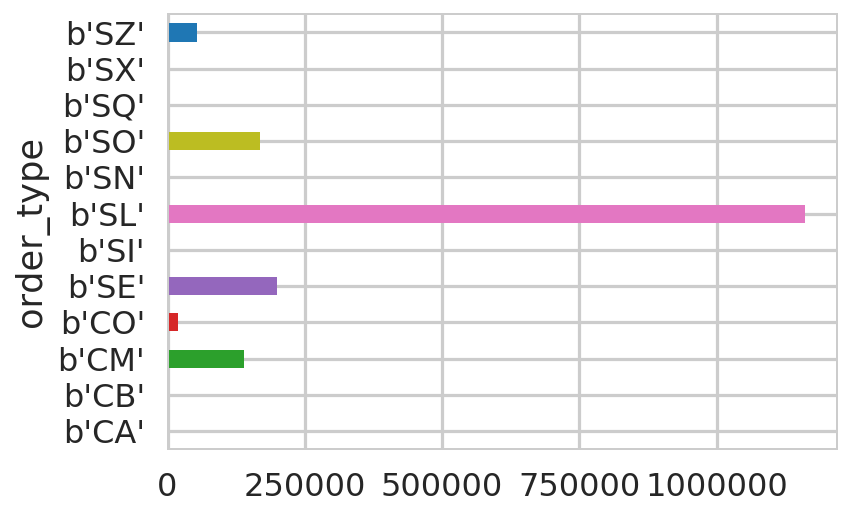

In [88]:
df.groupby('order_type')['note'].count().plot(kind='barh')

In [120]:
df_cm = df[df['order_type']=='CM']['note']

In [122]:
df_cm.values

array(['11088929',
       'Customer PO--- A0000223674 ATTN: Cindy Lalonde Feb 14/18 Kat harine 3143 NOTl',
       '****Prices verified in coupa***', ...,
       'MYLENE ACCEPTE ESTIMATION.', 'Labor Charge', 'Arrival Fee'], dtype=object)

In [159]:
df_cm.str.extract("(?P<letter>[\W]+)", expand=True).groupby

<bound method NDFrame.groupby of         letter
0          NaN
1             
2         ****
3             
4          ***
5             
6             
7          ***
8             
9             
10          # 
11            
12           .
13            
14            
15            
16            
17            
18            
19            
20            
21            
22          . 
23            
24            
25            
26            
27          # 
28          , 
29          # 
...        ...
1745840       
1745841       
1745842       
1745843       
1745844       
1745845       
1745846       
1745847       
1745848       
1745849       
1745850      #
1745851       
1745852       
1745853    NaN
1745854       
1745855       
1745856       
1745857       
1745858       
1745859       
1745860       
1745861       
1745862      :
1745863      :
1745864     : 
1745865       
1745866       
1745867       
1745868       
1745869       

[1745870 rows x 1 columns]>

In [162]:
def preproc (text) :
    text = re.sub('[\W]+', ' ', text.lower())
    return text

In [164]:
df_cm = df_cm.apply(preproc)

## bag of words

In [168]:
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk

In [170]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [173]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [174]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [176]:
def tokenizer(text) :
    return text.split()

In [180]:
df_cm.head().apply(tokenizer)

0                                           [11088929]
1    [customer, po, a0000223674, attn, cindy, lalon...
2                        [prices, verified, in, coupa]
3    [customer, po, a0000223666, attn, cindy, lalon...
4                        [prices, verified, in, coupa]
Name: note, dtype: object

In [125]:
count = CountVectorizer()

In [181]:
docs = df_cm.values

array(['11088929',
       'Customer PO--- A0000223674 ATTN: Cindy Lalonde Feb 14/18 Kat harine 3143 NOTl',
       '****Prices verified in coupa***', ...,
       'MYLENE ACCEPTE ESTIMATION.', 'Labor Charge', 'Arrival Fee'], dtype=object)

In [128]:
count

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [182]:
bag = count.fit_transform(docs)

In [183]:
count.vocabulary_

{'11088929': 39188,
 'customer': 222647,
 'po': 263971,
 'a0000223674': 193950,
 'attn': 209750,
 'cindy': 218720,
 'lalonde': 247910,
 'feb': 233114,
 '14': 103542,
 '18': 125186,
 'kat': 246002,
 'harine': 239472,
 '3143': 137807,
 'notl': 257276,
 'prices': 265312,
 'verified': 288930,
 'in': 241763,
 'coupa': 221585,
 'a0000223666': 193948,
 'a0000223663': 193946,
 'nicole': 256747,
 'van': 288429,
 'der': 225142,
 'hoeven': 240355,
 'katharine': 246050,
 'nmotl': 256969,
 'coupa8': 221586,
 'a0000223464': 193920,
 'emily': 229900,
 'ward': 289996,
 'records': 268677,
 'room': 274127,
 'way': 290197,
 'syringe': 282318,
 'leaking': 248548,
 'water': 290124,
 'replaced': 270028,
 'valve': 288406,
 'and': 207807,
 'tested': 283458,
 'op': 259347,
 'adjusted': 205898,
 'on': 259110,
 'adec': 205780,
 'block': 213105,
 'checked': 218162,
 'all': 207189,
 'stools': 280943,
 'tightened': 284168,
 'as': 209029,
 'needed': 256329,
 'labor': 247745,
 'charge': 217953,
 'arrival': 208921,
 '